# MNIST Digits Conv-Net
---
This notebook trains a CNN to classify the MNIST hadden written digits dataset. It uses the Tensorflow Keras API to build, train, and evaluate the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import utils as np_utils

In [2]:
nb_classes = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


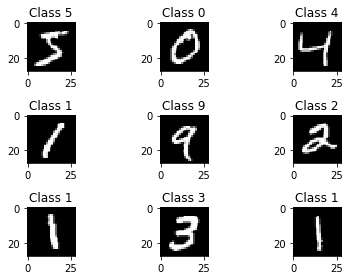

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

### Preprocess the Images

In [4]:
X_train = np.expand_dims(X_train, axis=4)
X_test = np.expand_dims(X_test, axis=4)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


/anaconda3/envs/mnist/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/mnist/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


### One-Hot Encode the Labels

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build

In [6]:
inputs = Input(shape=(28,28,1))

x = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
c2_1 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
c2_2 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)

m2_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(c2_1)
m2_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(c2_2)

c3_1 = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(m2_1)
c3_2 = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(m2_2)

x = keras.layers.Concatenate(axis=-1)([c3_1, c3_2])
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = Dense(500, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   18496       max_pooling2d[0][0]              
__________________________________________________________________________________________________
conv2d_2 (

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train

In [9]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=1, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 599s 10ms/step - loss: 0.1247 - acc: 0.9602 - val_loss: 0.0347 - val_acc: 0.9880


# Evaluate

In [10]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 28s 3ms/step
Test score: 0.034695032282869215
Test accuracy: 0.988


# Inspect the Output

In [11]:
predicted_classes = y_classes = model.predict(X_test).argmax(axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

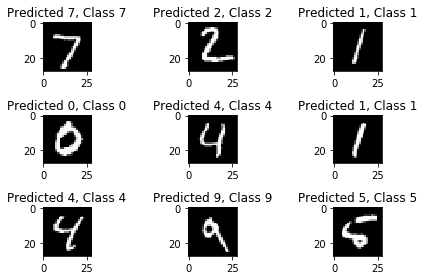

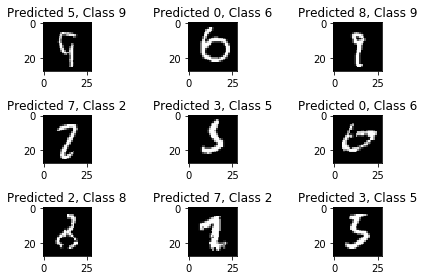

In [12]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))